In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Get a list of column names and types for 'measurement'
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Get a list of column names and types for 'station'
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
engine.execute(text('SELECT * FROM measurement LIMIT 5')).fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [12]:
engine.execute(text('SELECT * FROM station LIMIT 20')).fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [13]:
# Find the most recent date in the data set.
query_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
query_date

('2017-08-23',)

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Date one year ago: ", year_ago)

Date one year ago:  2016-08-23


In [21]:
# # Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).\
        filter(measurement.date >= year_ago).\
        order_by(measurement.date).all()

prcp_rows = [{"Date": result[0], "Precipitation": result[1]} for result in results]
prcp_rows


[{'Date': '2016-08-23', 'Precipitation': 0.0},
 {'Date': '2016-08-23', 'Precipitation': 0.15},
 {'Date': '2016-08-23', 'Precipitation': 0.05},
 {'Date': '2016-08-23', 'Precipitation': None},
 {'Date': '2016-08-23', 'Precipitation': 0.02},
 {'Date': '2016-08-23', 'Precipitation': 1.79},
 {'Date': '2016-08-23', 'Precipitation': 0.7},
 {'Date': '2016-08-24', 'Precipitation': 0.08},
 {'Date': '2016-08-24', 'Precipitation': 2.15},
 {'Date': '2016-08-24', 'Precipitation': 2.28},
 {'Date': '2016-08-24', 'Precipitation': None},
 {'Date': '2016-08-24', 'Precipitation': 1.22},
 {'Date': '2016-08-24', 'Precipitation': 2.15},
 {'Date': '2016-08-24', 'Precipitation': 1.45},
 {'Date': '2016-08-25', 'Precipitation': 0.08},
 {'Date': '2016-08-25', 'Precipitation': 0.08},
 {'Date': '2016-08-25', 'Precipitation': 0.0},
 {'Date': '2016-08-25', 'Precipitation': 0.0},
 {'Date': '2016-08-25', 'Precipitation': 0.21},
 {'Date': '2016-08-25', 'Precipitation': 0.06},
 {'Date': '2016-08-25', 'Precipitation': 0.1

In [60]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
prcp_df = pd.DataFrame(prcp_rows, columns=['Date', 'Precipitation'])
prcp_df.sort_values(by=['Date'])
prcp_df = prcp_df.dropna()
prcp_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


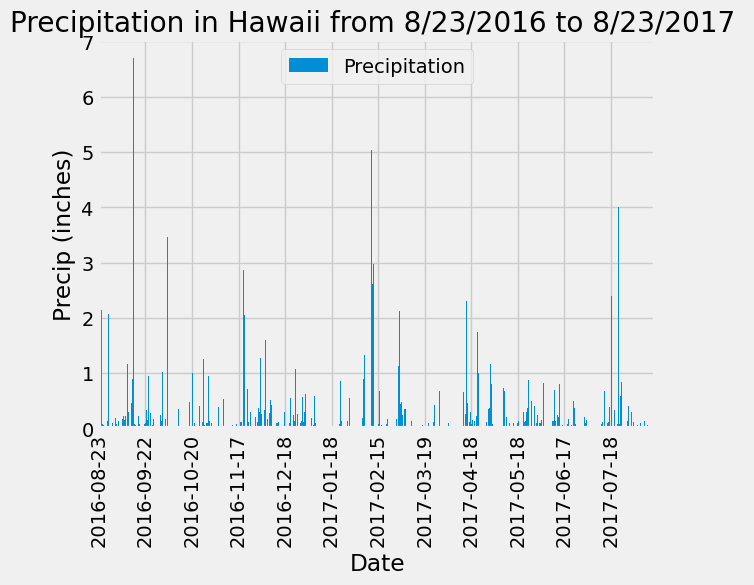

In [61]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_df.plot.bar(x='Date', y='Precipitation', width = 1.0) 

# Setting title
plt.title("Precipitation in Hawaii from 8/23/2016 to 8/23/2017 ")
  
# Setting the x and y labels
plt.xlabel("Date")
plt.ylabel("Precip (inches)")
  
# Setting the number of ticks
plt.locator_params(axis='x', nbins=12)

# Showing the plot
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df[['Precipitation']].describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [68]:
# Design a query to calculate the total number of stations in the dataset
total_count = session.query(station).distinct().count()
print(total_count)

9


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(
                station.station, 
                func.count(station.station).label("total_counts")
            ).group_by(
                station.station
            ).all()

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()